<a href="https://colab.research.google.com/github/CyberMaryVer/detectron-doc/blob/master/notebooks/Detectron2_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectron2 Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">



https://github.com/facebookresearch/detectron2

>[Detectron2 Tutorial](#scrollTo=QHnVupBBn9eR)

>[Installation](#scrollTo=vM54r6jlKTII)

>[Inference for image](#scrollTo=Vk4gID50K03a)

>[How to work with outputs](#scrollTo=cAO1i_BxnHVI)

>[Train with dataset in COCO format](#scrollTo=RjB_GYRQyinN)

>>[Train!](#scrollTo=wlqXIXXhW8dA)

>>[Inference & evaluation using the trained model](#scrollTo=0e4vdDIOXyxF)

>[Example of different keypoint model](#scrollTo=oKBbjnLw5GGG)

>[Convert model >> Caffee >> ONNX](#scrollTo=RFiST7y_GNft)

>>[Test converted model](#scrollTo=_BQpdCSIg8dD)

>[Inference for video](#scrollTo=hiXadAb9Fv-L)

>>[Let's make it work with Google Colab](#scrollTo=gdnPMrMPG02n)

>>[In case of problems - uncomment and run this part](#scrollTo=tg3X3HkSvxlF)

>>[Install Detectron2](#scrollTo=okYuWS33v-7c)

>>[Keypoints](#scrollTo=4w3xYsqUI4kF)

>>[Output example](#scrollTo=FKXz-oXIYgUv)

>[Change backbone model](#scrollTo=vqSDDUD_4SPn)

>[Run loop](#scrollTo=RMkCRuMRPNvH)



# Installation

!Note: detectron2 at the moment doesn't work with torch 1.8, you need to downgrade torch to 1.7

In [1]:
!pip install pyyaml==5.1
!gcc --version
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
!pip install torch==1.7.1 torchvision==0.8.2

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

     |████████████████████████████████| 276kB 8.3MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=a9f72c36b9b94cfe6233b09849bcf890e19a29375b7380fb2b36654db1036886
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.8MB 1.5MB/s 
     |████████████████████████████████| 51kB 3.7MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210330-cp37-none-any.whl size=58838 s

In [2]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Inference for image

In [3]:
# download input image
!wget https://sarajevo.travel/assets/photos/events/original/balkan-health-amp-fitness-summit-1540381827.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [4]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")) # we can change the path here
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml") # we can change the path here
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_a6e10b.pkl: 237MB [00:03, 66.6MB/s]                           
/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


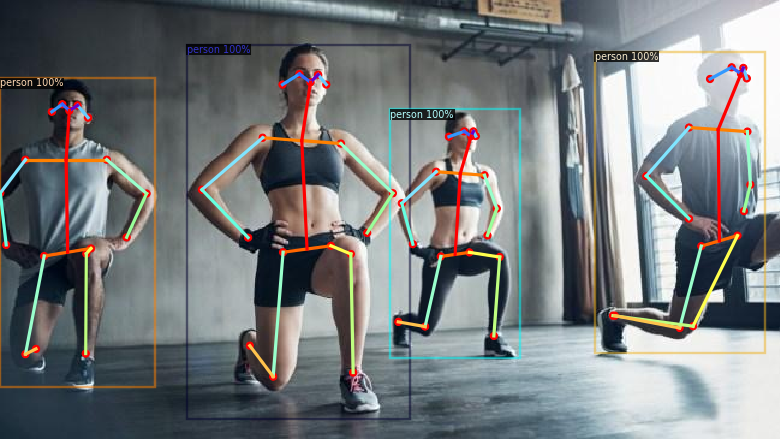

In [5]:
outputs = predictor(im)
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# How to work with outputs

Look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification

In [6]:
MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).keypoint_names

('nose',
 'left_eye',
 'right_eye',
 'left_ear',
 'right_ear',
 'left_shoulder',
 'right_shoulder',
 'left_elbow',
 'right_elbow',
 'left_wrist',
 'right_wrist',
 'left_hip',
 'right_hip',
 'left_knee',
 'right_knee',
 'left_ankle',
 'right_ankle')

In [ ]:
MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).keypoint_connection_rules

[('left_ear', 'left_eye', (102, 204, 255)),
 ('right_ear', 'right_eye', (51, 153, 255)),
 ('left_eye', 'nose', (102, 0, 204)),
 ('nose', 'right_eye', (51, 102, 255)),
 ('left_shoulder', 'right_shoulder', (255, 128, 0)),
 ('left_shoulder', 'left_elbow', (153, 255, 204)),
 ('right_shoulder', 'right_elbow', (128, 229, 255)),
 ('left_elbow', 'left_wrist', (153, 255, 153)),
 ('right_elbow', 'right_wrist', (102, 255, 224)),
 ('left_hip', 'right_hip', (255, 102, 0)),
 ('left_hip', 'left_knee', (255, 255, 77)),
 ('right_hip', 'right_knee', (153, 255, 204)),
 ('left_knee', 'left_ankle', (191, 255, 128)),
 ('right_knee', 'right_ankle', (255, 195, 77))]

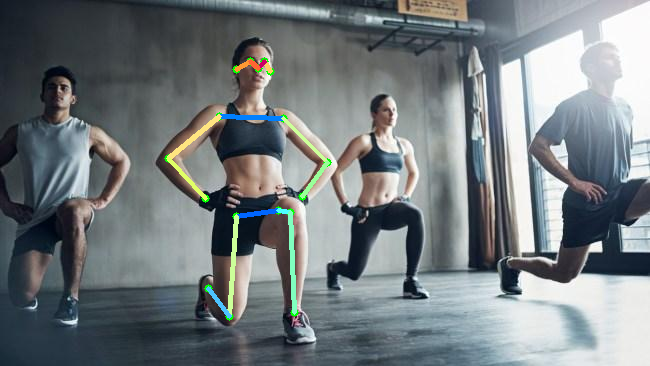

In [87]:
import cv2

NUM_INSTANCE = 1

keypoint_dict = {}
for i in zip(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).keypoint_names, outputs["instances"].pred_keypoints[NUM_INSTANCE]):
  keypoint_dict.update({i[0]: i[1][:2,]})

# extract and draw keypoints - example
image = np.asarray(im.copy())
for i in outputs["instances"].pred_keypoints[NUM_INSTANCE]:
  image = cv2.circle(image.astype(np.float64), (i[0],i[1]), radius=4, color=(0, 255, 0), thickness=-1)
 
# draw lines - example
rules = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).keypoint_connection_rules

for rule in rules:
    p1, p2, _ = rule
    x1, y1 = keypoint_dict[p1]
    x2, y2 = keypoint_dict[p2]
    image = cv2.line(image, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), thickness=4)

cv2_imshow(image)

# Train with dataset in COCO format

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

annFile='/content/drive/MyDrive/datasets/annotations/coco_person.json'
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [8]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(" ".join(nms)))

COCO categories: 
person



In [9]:
# if your dataset is in COCO format, this cell can be replaced by the following three lines:
from detectron2.data.datasets import register_coco_instances

path_to_json = '/content/drive/MyDrive/datasets/annotations/coco_person.json'
path_to_img = '/content/drive/MyDrive/datasets/coco_person/'
register_coco_instances("dataset_train", {}, path_to_json, path_to_img)
# register_coco_instances("my_dataset_test", {}, path_to_json, path_to_img)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


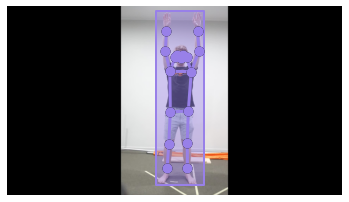

In [10]:
coco_kps=COCO(annFile)

catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = imgIds[0])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread(path_to_img + img['file_name'])

plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

## Train!

Now, let's fine-tune a COCO-pretrained R50-FPN Mask R-CNN model on the custom keypoints dataset. It takes ~6 minutes to train 300 iterations on Colab's K80 GPU, or ~2 minutes on a P100 GPU.


In [11]:
#@title Choose model to train

model_file = 'COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml' #@param ["COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x.yaml", "COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml", "COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml", "COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"]

print(f"Model:\n{model_file}")

Model:
COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml


In [14]:
MetadataCatalog.get("dataset_train").name

'dataset_train'

In [36]:
from detectron2.engine import DefaultTrainer
from detectron2.data import MetadataCatalog

MetadataCatalog.get("dataset_train").thing_classes = ["person"]
# keypoint_names = ['d1_i', 'd1_f', 'd2_i', 'd2_f', 'd3_i', 'd3_f', 'v1_i', 'v1_f', 'v2_i', 'v2_f']
# keypoint_flip_map = [('d1_i', 'd1_f'), ('d2_i', 'd2_f'), ('d3_i', 'd3_f'), ('v1_i', 'v1_f'), ('v2_i', 'v2_f')]

keypoint_names = ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 
                  'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
                  'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 
                  'left_knee', 'right_knee', 'left_ankle', 'right_ankle']
keypoint_flip_map = [('left_eye', 'right_eye'),
                     ('left_ear', 'right_ear'),
                     ('left_shoulder', 'right_shoulder'),
                     ('left_elbow', 'right_elbow'),
                     ('left_wrist', 'right_wrist'),
                     ('left_hip', 'right_hip'),
                     ('left_knee', 'right_knee'),
                     ('left_ankle', 'right_ankle')]

for d in ["train", "test"]:
  MetadataCatalog.get(f"dataset_{d}").keypoint_names = keypoint_names
  MetadataCatalog.get(f"dataset_{d}").keypoint_flip_map = keypoint_flip_map

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(model_file))
cfg.DATASETS.TRAIN = ("dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_file)  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
cfg.MODEL.KEYPOINT_ON = True
cfg.MODEL.ROI_KEYPOINT_HEAD.NUM_KEYPOINTS = 17 # for keypoints only
# cfg.TEST.KEYPOINT_OKS_SIGMAS = [0.8 for _ in range(17)] # for keypoints only
# cfg.MODEL.ROI_KEYPOINT_HEAD.MIN_KEYPOINTS_PER_IMAGE = 1
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[03/26 19:08:39 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [88]:
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.modeling import build_model

model = build_model(cfg)
path_to_model = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
DetectionCheckpointer(model).load(path_to_model)  # load a file, usually from cfg.MODEL.WEIGHTS

checkpointer = DetectionCheckpointer(model, save_dir="output")
checkpointer.save("trained_model")  # save to output/trained_model.pth

## Inference & evaluation using the trained model
Now, let's run inference with the trained model on the balloon validation dataset. First, let's create a predictor using the model we just trained:



In [59]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold

In [72]:
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
custom_im = out.get_image()[:, :, ::-1]
# cv2_imshow(custom_im)

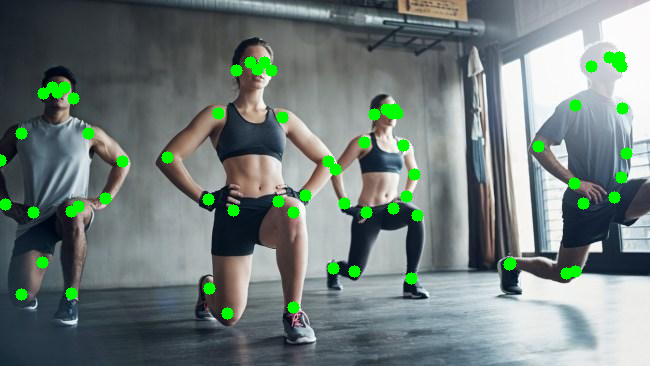

In [64]:
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

im_wk = np.asarray(im.copy())
num_inst = outputs["instances"].pred_keypoints.shape[0]

for inst in range(num_inst):
  keypoint_dict = {}
  for i in zip(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).keypoint_names, outputs["instances"].pred_keypoints[inst]):
    keypoint_dict.update({i[0]: i[1][:2,]})


  for name, i in keypoint_dict.items(): # draw keypoints for instance n1
      x, y = int(i[0]), int(i[1])
      im_wk = cv2.circle(im_wk,
                          (x, y),
                          radius=6,
                          color=(0, 255, 0),
                          thickness=-1)
      # im_wk = cv2.putText(im_wk, name, (x,y), cv2.FONT_HERSHEY_COMPLEX,.2,(0,255,0),1)

cv2_imshow(im_wk)

In [69]:
MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).keypoint_connection_rules = \
[('left_ear', 'left_eye', (102, 204, 255)),
 ('right_ear', 'right_eye', (51, 153, 255)),
 ('left_eye', 'nose', (102, 0, 204)),
 ('nose', 'right_eye', (51, 102, 255)),
 ('left_shoulder', 'right_shoulder', (255, 128, 0)),
 ('left_shoulder', 'left_elbow', (153, 255, 204)),
 ('right_shoulder', 'right_elbow', (128, 229, 255)),
 ('left_elbow', 'left_wrist', (153, 255, 153)),
 ('right_elbow', 'right_wrist', (102, 255, 224)),
 ('left_hip', 'right_hip', (255, 102, 0)),
 ('left_hip', 'left_knee', (255, 255, 77)),
 ('right_hip', 'right_knee', (153, 255, 204)),
 ('left_knee', 'left_ankle', (191, 255, 128)),
 ('right_knee', 'right_ankle', (255, 195, 77))]


# Example of different keypoint model

In [73]:
# Inference with a keypoint detection model - different keypoint model
cfg2 = get_cfg()   # get a fresh new config
cfg2.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg2.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg2.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml")
predictor = DefaultPredictor(cfg2)

Comparison - green points were predicted with custom model and red with pretrained model.

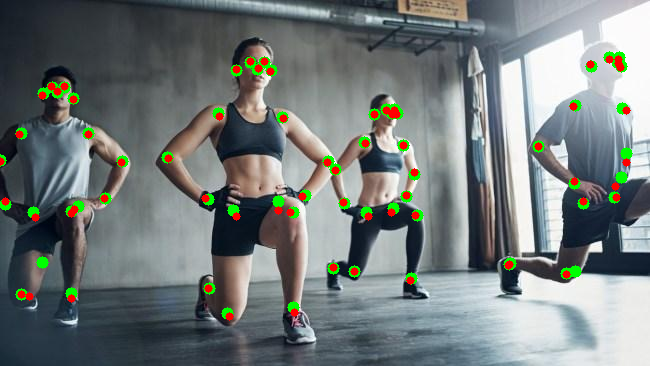

In [65]:
predictor = DefaultPredictor(cfg2)
outputs = predictor(im)

im_wk_ = np.asarray(im_wk.copy())
num_inst = outputs["instances"].pred_keypoints.shape[0]

for inst in range(num_inst):
  keypoint_dict = {}
  for i in zip(MetadataCatalog.get(cfg2.DATASETS.TRAIN[0]).keypoint_names, outputs["instances"].pred_keypoints[inst]):
    keypoint_dict.update({i[0]: i[1][:2,]})


  for name, i in keypoint_dict.items(): # draw keypoints for instance n1
      x, y = int(i[0]), int(i[1])
      im_wk_ = cv2.circle(im_wk_,
                          (x, y),
                          radius=4,
                          color=(0, 0, 255),
                          thickness=-1)
      
cv2_imshow(im_wk_)

Pretrained model from the model zoo


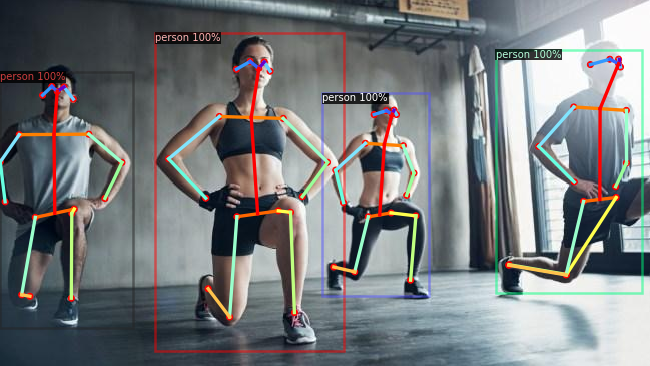

Model trained on the custom dataset


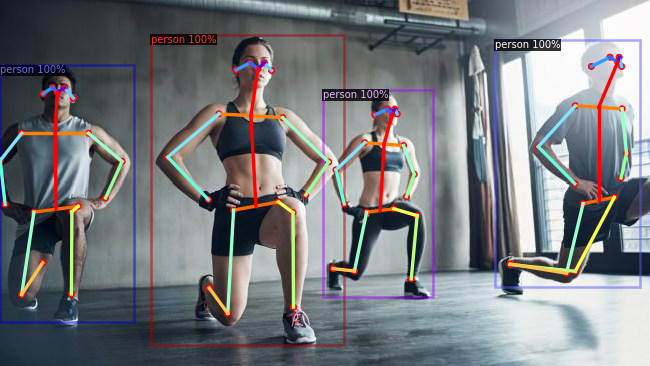

In [75]:
im = cv2.imread("input.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg2.DATASETS.TRAIN[0]), scale=1)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
print("Pretrained model from the model zoo")
cv2_imshow(out.get_image()[:, :, ::-1])
print("Model trained on the custom dataset")
cv2_imshow(custom_im)

# Convert model >> Caffee >> ONNX

First, we need to build the model from our configuration

In [ ]:
from detectron2.modeling import build_model

model = build_model(cfg)  # returns a torch.nn.Module

Next we need install onnx module and transform the model into caffe format and then into onnx format

In [ ]:
!pip install onnx

     |████████████████████████████████| 14.5MB 236kB/s 


In [ ]:
import onnx
from detectron2.export import Caffe2Tracer
from torchvision import transforms

tran = transforms.ToTensor()  # Convert the numpy array or PIL.Image read image to (C, H, W) Tensor format and /255 normalize to [0, 1.0]
img_tensor = tran(im)
tracer = Caffe2Tracer(cfg, model, [{"image": img_tensor}])
caffe2_traced = tracer.export_caffe2()

[03/16 13:22:39 d2.export.caffe2_export]: Exporting a Caffe2GeneralizedRCNN model via ONNX ... Some warnings from ONNX are expected and are usually not to worry about.


/usr/local/lib/python3.7/dist-packages/torch/onnx/utils.py:258: UserWarning: `add_node_names' can be set to True only when 'operator_export_type' is `ONNX`. Since 'operator_export_type' is not set to 'ONNX', `add_node_names` argument will be ignored.
  "`{}` argument will be ignored.".format(arg_name, arg_name))
/usr/local/lib/python3.7/dist-packages/torch/onnx/utils.py:258: UserWarning: `do_constant_folding' can be set to True only when 'operator_export_type' is `ONNX`. Since 'operator_export_type' is not set to 'ONNX', `do_constant_folding` argument will be ignored.
  "`{}` argument will be ignored.".format(arg_name, arg_name))
/usr/local/lib/python3.7/dist-packages/detectron2/export/c10.py:31: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert tensor.dim() == 2 an

[03/16 13:22:54 d2.export.caffe2_export]: ONNX export Done. Exported predict_net (before optimizations):
| type                   | input                                                                                                                                               | output                                     |
|:-----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------|
| AliasWithName          | ['data']                                                                                                                                            | ['322']                                    |
| AliasWithName          | ['im_info.1']                                                                                                                                       | ['im_info']                                |
| Sub  

In [ ]:
type(model), type(caffe2_traced)

(detectron2.modeling.meta_arch.rcnn.GeneralizedRCNN,
 detectron2.export.api.Caffe2Model)

In [ ]:
!mkdir models

In [ ]:
caffe2_traced.save_protobuf('model')

[03/16 13:28:22 d2.export.api]: Saving model to model ...


In [ ]:
caffe2_traced.save_graph('/model/graph.svg')

In [ ]:
onnx_model = tracer.export_onnx()
onnx.save(onnx_model, "model.onnx")

/usr/local/lib/python3.7/dist-packages/torch/onnx/utils.py:258: UserWarning: `add_node_names' can be set to True only when 'operator_export_type' is `ONNX`. Since 'operator_export_type' is not set to 'ONNX', `add_node_names` argument will be ignored.
  "`{}` argument will be ignored.".format(arg_name, arg_name))
/usr/local/lib/python3.7/dist-packages/torch/onnx/utils.py:258: UserWarning: `do_constant_folding' can be set to True only when 'operator_export_type' is `ONNX`. Since 'operator_export_type' is not set to 'ONNX', `do_constant_folding` argument will be ignored.
  "`{}` argument will be ignored.".format(arg_name, arg_name))
/usr/local/lib/python3.7/dist-packages/detectron2/export/c10.py:31: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert tensor.dim() == 2 an

## Test converted model

In [ ]:
onnx_model = onnx.load("model.onnx")
onnx.checker.check_model(onnx_model)

In [ ]:
!pip install onnxruntime

     |████████████████████████████████| 4.1MB 11.1MB/s 


https://github.com/facebookresearch/detectron2/issues/1868

>>> 

*Export the model to ONNX format. Note that the exported model contains custom ops only available in caffe2, therefore it cannot be directly executed by other runtime (such as onnxruntime or TensorRT). Post-processing or transformation passes may be applied on the model to accommodate different runtimes, but we currently do not provide support for them.*

In [ ]:
# import onnxruntime

# ort_session = onnxruntime.InferenceSession("model.onnx")

# def t_to_numpy(tensor):
#     return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# # compute ONNX Runtime output prediction
# ort_inputs = {ort_session.get_inputs()[0].name: t_to_numpy(x)}
# ort_outs = ort_session.run(None, ort_inputs)

# # compare ONNX Runtime and PyTorch results
# np.testing.assert_allclose(to_numpy(torch_out), ort_outs[0], rtol=1e-03, atol=1e-05)

# print("Exported model has been tested with ONNXRuntime")

# Inference for video

We will be using this one

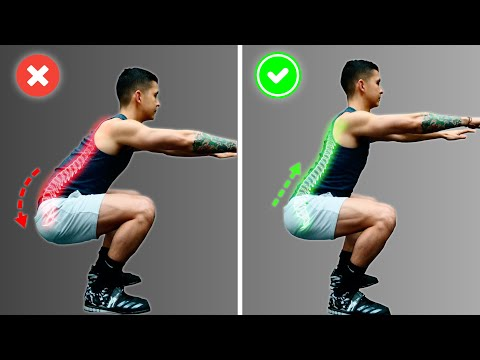

In [8]:
# This is the video we're going to process
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("U3HlEF_E9fo", width=500)
display(video)

In [9]:
# Install dependencies, download the video, and crop 10 seconds for processing
!pip install youtube-dl
!youtube-dl https://www.youtube.com/watch?v=U3HlEF_E9fo -f 22 -o video.mp4
!ffmpeg -i video.mp4 -ss 00:04:43 -to 00:05:05 -c:v copy input.mp4

     |████████████████████████████████| 1.9MB 19.8MB/s 
[youtube] U3HlEF_E9fo: Downloading webpage
[download] Destination: video.mp4
[download] 100% of 38.50MiB in 00:01
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --en

## Let's make it work with Google Colab

In [10]:
!pip install pyyaml==5.1
!gcc --version

!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
!pip install torch==1.7.1 torchvision==0.8.2

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

     |████████████████████████████████| 276kB 18.8MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=767b6ec3686981ebafd0343a2bffb1c11557d9038f91379e954841c754351693
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.8MB 618kB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210330-cp37-none-any.whl size=58838 

## In case of problems - uncomment and run this part

To avoid some technical issues we have to uninstall some libraries first (like in official tutorial)

In [21]:
# !pip uninstall opencv-python opencv-python-headless opencv-contrib-python

In my case Google Colab after that couldn't import cv2 module (python3-opencv was installed). I fixed it by installing opencv-python library. 

In [22]:
# !pip install opencv-python-headless opencv-contrib-python
# !pip install opencv-python

**Restart**

In [23]:
# !apt install python3-opencv

## Install Detectron2

In [11]:
# Run frame-by-frame inference demo on this video (takes 3-4 minutes) with the "demo.py" tool we provided in the repo.
!git clone https://github.com/facebookresearch/detectron2

Cloning into 'detectron2'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 11469 (delta 42), reused 63 (delta 31), pack-reused 11337
Receiving objects: 100% (11469/11469), 4.64 MiB | 27.96 MiB/s, done.
Resolving deltas: 100% (8322/8322), done.


This is another issue I encountered. The module could not work with mp4 extension due to the license limitations. To avoid this we need change one line in the code of demo.py file.

Reference: https://www.swiftlane.com/blog/generating-mp4s-using-opencv-python-with-the-avc1-codec/

In [12]:
!grep -rl "fourcc=cv2.VideoWriter_fourcc" /content/detectron2/demo/demo.py | xargs sed -i 's/x264/mp4v/g'

In [24]:
# !cat "fourcc=cv2.VideoWriter_fourcc" /content/detectron2/demo/demo.py

## Keypoints

weights are here: 

[detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl](https://)

In [3]:
#@title Choose model for the inference {run: auto}

model = 'COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml' #@param ["COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x.yaml", "COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml", "COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml", "COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"]
idx = ["COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x.yaml", "COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml", "COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml", "COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"].index(model_file)
print(f"Model {idx}:\n{model}")

Model 2:
COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml


In [14]:
model_files = {1:"https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x/137261548/model_final_04e291.pkl",
               2:"https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl",
               3:"https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/138363331/model_final_997cc7.pkl",
               4:"https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl"}

model_file = model_files[idx].replace("https://dl.fbaipublicfiles.com/detectron2", "detectron2:/")
print(model_file)

detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl


In [16]:
! echo $model_file
!python detectron2/demo/demo.py --config-file detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml --video-input input.mp4 --confidence-threshold 0.5 --output video-output.mp4 \
--opts MODEL.WEIGHTS $model_file

detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl
[04/01 13:58:28 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl'], output='video-output2.mp4', video_input='input.mp4', webcam=False)
[04/01 13:58:32 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl
[04/01 13:58:32 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
  0% 0/566 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_

In [17]:
!ffmpeg -i video-output.mp4 -t 5 -c copy output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

## Output example

In [19]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "/content/output.mp4"
# Compressed video path
compressed_path = "/content/output_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Change backbone model

* https://github.com/facebookresearch/detectron2/blob/f71d8458e7fb9a45bf46518e8371bef5a8afb93e/detectron2/modeling/backbone/build.py

* https://github.com/facebookresearch/Detectron/blob/master/detectron/modeling/ResNet.py

# Run loop

In [6]:
from time import time
i = 0
start_time = time()
while True:
  try:
    i += 1
    if i%1000000 == 0:
      if i%100000000 == 0:
        end = '\n'
      else:
        end = ''
      print('.', end=end)

  except KeyboardInterrupt:
    print('\nInterrupted by user')
    print(f'total i: {i}\ntotal time: {time()-start_time:.2f}')
    break

....................................................................................................
....................................................................................................
....................................................................................................
..............................................................................
Interrupted by user
total i: 378159661
total time: 43.11
